# Forecasting per NO2

Importiamo le librerie necessarie e definiamo il path dove stanno i dataset

In [44]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
path = r".\\DataSet\\"

Apriamo il csv contenente i dati, convertiamo la data e raggruppiamo per giorno i risultati delle varie stazioni alle varie ore del giorno, facendone la media.

In [45]:
allMadrid = pd.read_csv(path+"out.csv")
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d')
allMadrid['date']=allMadrid['date'].dt.normalize()
allMadrid=allMadrid.groupby(['date']).mean()
display(allMadrid)

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
date,,,,,,,,,,,,,
2008-01-01,1.314348,0.652554,1.040163,0.314783,11.820078,67.084565,9.280977,39.855419,25.650870,19.815357,1.656304,4.026522,2.807902e+07
2008-01-02,1.128177,0.531806,1.016719,0.270625,11.820078,66.552372,9.750819,21.005401,15.767895,14.897970,1.536750,3.857708,2.807902e+07
2008-01-03,0.727969,0.360000,0.942292,0.229083,11.820078,50.410930,30.313847,9.173423,5.617396,10.923919,1.400333,2.911875,2.807902e+07
2008-01-04,0.907969,0.458993,1.062031,0.257647,11.820078,58.247292,20.756432,21.390939,13.236000,12.875144,1.409706,4.055104,2.807902e+07
2008-01-05,0.823750,0.389635,0.785260,0.238250,11.820078,47.282292,20.405407,18.745682,12.485729,11.804503,1.482792,3.244219,2.807902e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-27,0.364583,0.249583,0.443750,0.062639,7.756522,26.074783,65.695783,26.278317,10.256944,3.677966,1.340833,1.625000,2.807904e+07
2018-04-28,0.216667,0.212917,0.194444,0.055000,2.824653,13.512153,71.706587,10.971154,5.930556,3.604167,1.300556,0.691667,2.807904e+07
2018-04-29,0.193750,0.218333,0.133333,0.053194,2.333333,11.098958,78.044643,6.955128,3.229167,3.591667,1.289861,0.370833,2.807904e+07


Prendiamo i dati relativi al NO2 e stampiamo il suo andamento

<AxesSubplot: xlabel='date'>

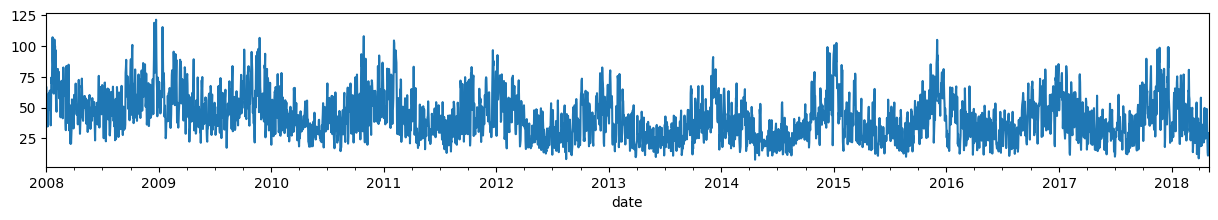

In [46]:
forNo2 = allMadrid['NO_2']
forNo2.plot(figsize=(15, 2))

Ora creiamo il modello per le previsioni. 
Il modello scelto è un AR(1), e lo costruiremo grazie alla classe `SARIMAX` di statsmodels.
Poi stimiamo i suoi parametri con il metodo `fit`. 
Infine con il metodo `summary` produrremo le diverse tabelle che mostrano i risultati.

In [47]:
# Costruiamo il modello AR(1)
mod = sm.tsa.SARIMAX(forNo2, order=(1, 0, 0), trend='c')
# Stimiamo i parametri del modello
res = mod.fit()
# Stampiamo i risultati
print(res.summary())

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NO_2   No. Observations:                 3774
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -14865.353
Date:                Tue, 29 Nov 2022   AIC                          29736.705
Time:                        08:14:40   BIC                          29755.413
Sample:                    01-01-2008   HQIC                         29743.356
                         - 05-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.2452      0.577     19.503      0.000      10.115      12.375
ar.L1          0.7367      0.011     67.235      0.000       0.715       0.758
sigma2       154.3971      3.292     46.904      0.0

Procediamo ora facendo il forecast, ovvero la previsione relativa ad altri 5 giorni del 2018

NO_2             mean    mean_se  mean_ci_lower  mean_ci_upper
2018-05-02  32.703013  12.425664      12.264615      53.141411
2018-05-03  35.339108  15.433846       9.952691      60.725525
2018-05-04  37.281247  16.843206       9.576638      64.985856
2018-05-05  38.712115  17.560908       9.826992      67.597239
2018-05-06  39.766305  17.938456      10.260170      69.272440


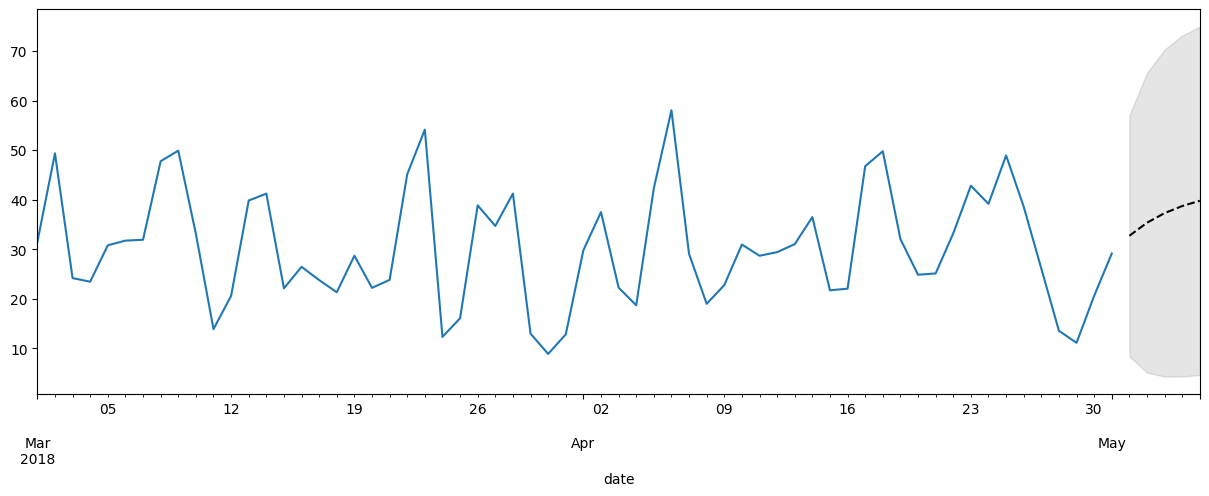

In [51]:
fcast_res1 = res.get_forecast(steps=5)
#stampiamo il forecast specificando per esso un intervallo di confidenza del 90%
print(fcast_res1.summary_frame(alpha=0.10))

fig, ax = plt.subplots(figsize=(15, 5))

# Mettiamo nel grafico i dati, prendendone un sotto insieme che va dal 2018-03-01 per rendere il tutto più visibile
forNo2.loc['2018-03-01':].plot(ax=ax)

# Costruiamo il forecast
fcast = res.get_forecast(steps=5).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

In [52]:
nforecasts = 3
forecasts = {}

# Settiamo il numero di elementi del training set considerando di prendere l'80% dei dati a disposizione
nobs = len(forNo2)
n_init_training = int(nobs * 0.8)

# Creiamo il modello per il training
init_training_forNo2 = forNo2.iloc[:n_init_training]
mod = sm.tsa.SARIMAX(init_training_forNo2, order=(1, 0, 0), trend='c')
res = mod.fit()

# Salviamo il forecast iniziale
forecasts[init_training_forNo2.index[-1]] = res.forecast(steps=nforecasts)

# Andiamo avanti per i vari componenti del campione
for t in range(n_init_training, nobs):
    # aggiorniamo il risultato con l'append della nuova osservazione
    updated_forNo2 = forNo2.iloc[t:t+1]
    res = res.append(updated_forNo2, refit=False)
    # Salviasmo il nuovo insieme di forecasts
    forecasts[updated_forNo2.index[0]] = res.forecast(steps=nforecasts)

# Mettiamo insieme tutti i forecasts in un dataframe
forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:5, :5])

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


            2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10
2016-04-07   36.259171         NaN         NaN         NaN         NaN
2016-04-08   38.093943   39.095102         NaN         NaN         NaN
2016-04-09   39.454403   40.196750   27.720482         NaN         NaN
2016-04-10         NaN   41.013608   31.762614   31.276016         NaN
2016-04-11         NaN         NaN   34.759804   34.398998   22.631769


In [53]:
# Calcoliamo l'errore del forecast
forecast_errors = forecasts.apply(lambda column: forNo2 - column).reindex(forecasts.index)
# Re-indicizziamo i forecasts 
def flatten(column):
    return column.dropna().reset_index(drop=True)

flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')

print(flattened.iloc[:3, :5])

         2016-04-06  2016-04-07  2016-04-08  2016-04-09  2016-04-10
horizon                                                            
1          1.350204  -16.826005   -0.656246  -15.869766    7.207392
2        -15.824846  -13.132514  -16.356364   -4.559837    6.697117
3        -12.390167  -25.607358   -4.920643   -2.028134   -2.558871


In [54]:
# Calcoliamo lo squarto quadratico medio
rmse = (flattened**2).mean(axis=1)**0.5

print(rmse)

horizon
1    12.272094
2    15.648231
3    16.589712
dtype: float64
